https://www.kaggle.com/datasets/mohammedmurtuzalabib/processed-android

dataset link

**1.  Google Play Store apps and reviews**

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data

In [41]:
# Read in dataset
import matplotlib.pyplot as plt
import pandas as pd
apps_with_duplicates = pd.read_csv('data_set/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9142,10313,FD e-paper,NEWS_AND_MAGAZINES,3.1,183,7.1,"10,000+",Free,0,Everyone,News & Magazines,"July 4, 2018",2.2.9,4.1 and up
7543,8647,"My Effectiveness: To do, Tasks",PRODUCTIVITY,4.6,14089,8.4,"500,000+",Free,0,Everyone,Productivity,"August 5, 2018",0.21.1,4.1 and up
4631,5607,SAMURAI vs ZOMBIES DEFENSE,GAME,4.5,407788,19.0,"5,000,000+",Free,0,Everyone,Action,"July 18, 2013",3.4.0,2.1 and up
7503,8598,DN Premium Hookah Lounge,BUSINESS,NaN,1,4.2,50+,Free,0,Everyone,Business,"October 21, 2015",1,2.3 and up
2031,2573,Meet – Talk to Strangers Using Random Video Chat,SOCIAL,4.6,60562,15.0,"5,000,000+",Free,0,Mature 17+,Social,"August 6, 2018",1.3.2,4.3 and up


**2. Data cleaning**

The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. The info() function (from the previous task) told us that Installs and Price columns are of type object and not int64 or float64 as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be numeric as their name suggests.


Hence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later. Specifically, the presence of special characters (, $ +) in the Installs and Price columns make their conversion to a numerical data type difficult.

In [3]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

**3.  Exploring app categories**

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

. Which category has the highest share of (active) apps in the market?


. Is any specific category dominating the market? 


. Which categories have the fewest number of apps?


We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [34]:
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Load the apps dataset
apps = pd.read_csv('data_set/apps.csv')

# Load the user reviews dataset
user_reviews = pd.read_csv('data_set/user_reviews.csv')

# Print the total number of unique categories in the apps dataset
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
category_app_counts = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x=category_app_counts.index,  # index = category name
        y=category_app_counts.values,  # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


**4. Distribution of app ratings**

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.



In [35]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


**5. Size and price of an app**

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

. Does the size of an app affect its rating?


. Do users really care about system-heavy apps or do they prefer light-weighted apps?


. Does the price of an app affect its rating?


. Do users always prefer free apps over paid apps?


We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

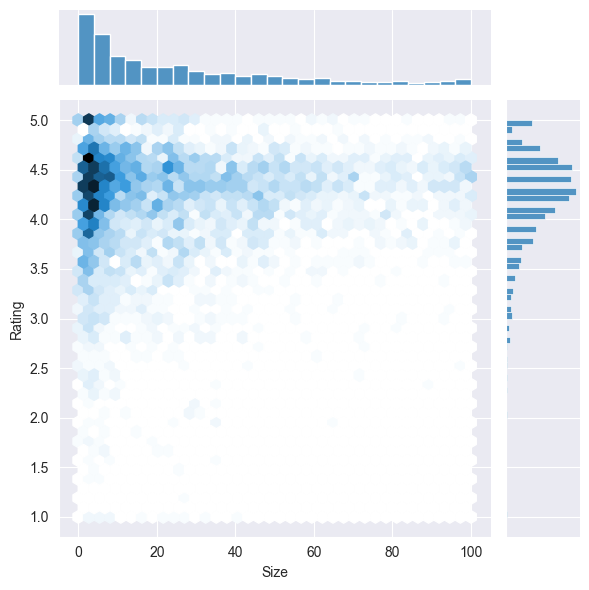

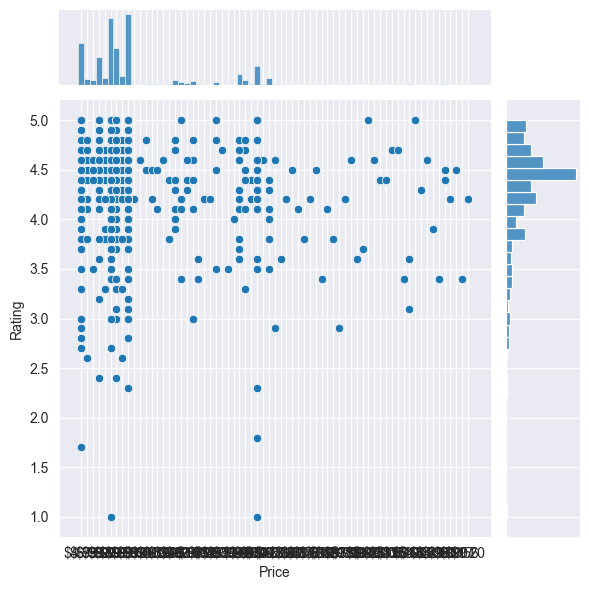

In [36]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

**6. Relation between app category and app price**

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.



,Category,App,Price


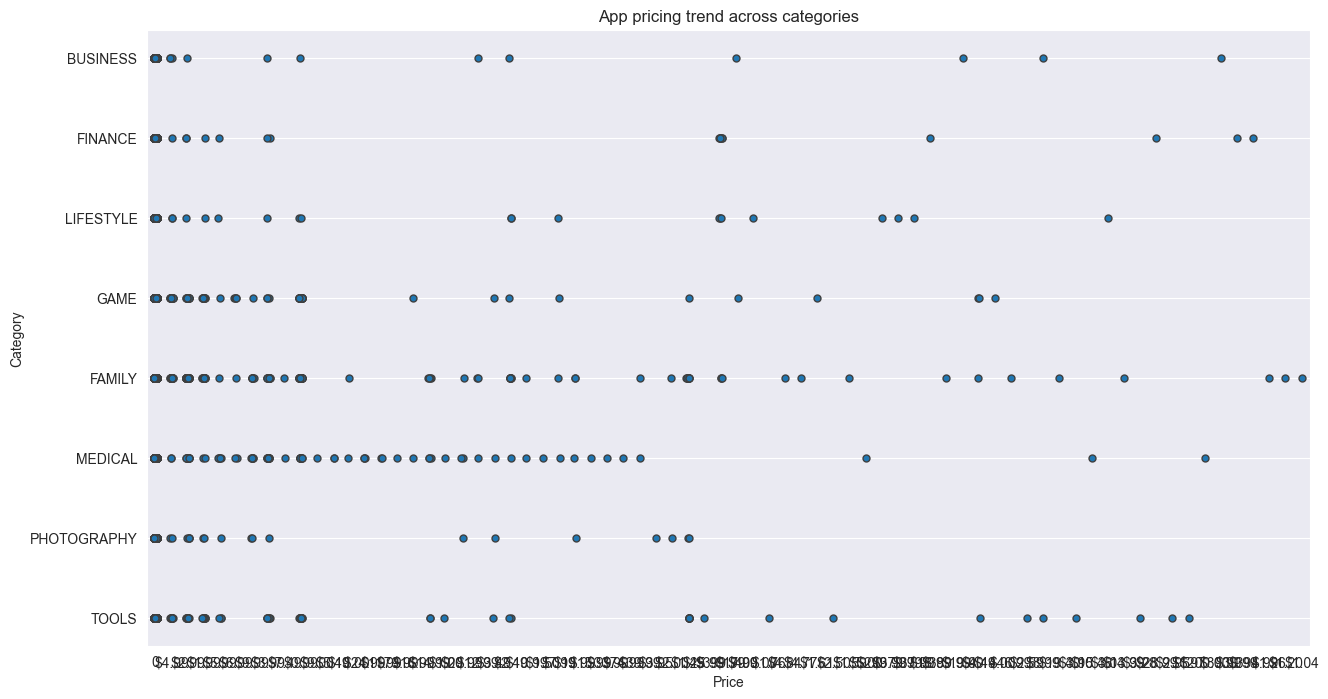

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Convert the 'Price' column to a numeric type
popular_app_cats['Price'] = pd.to_numeric(popular_app_cats['Price'], errors='coerce')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 10]
apps_above_200

**7. Filter out "junk" apps**

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

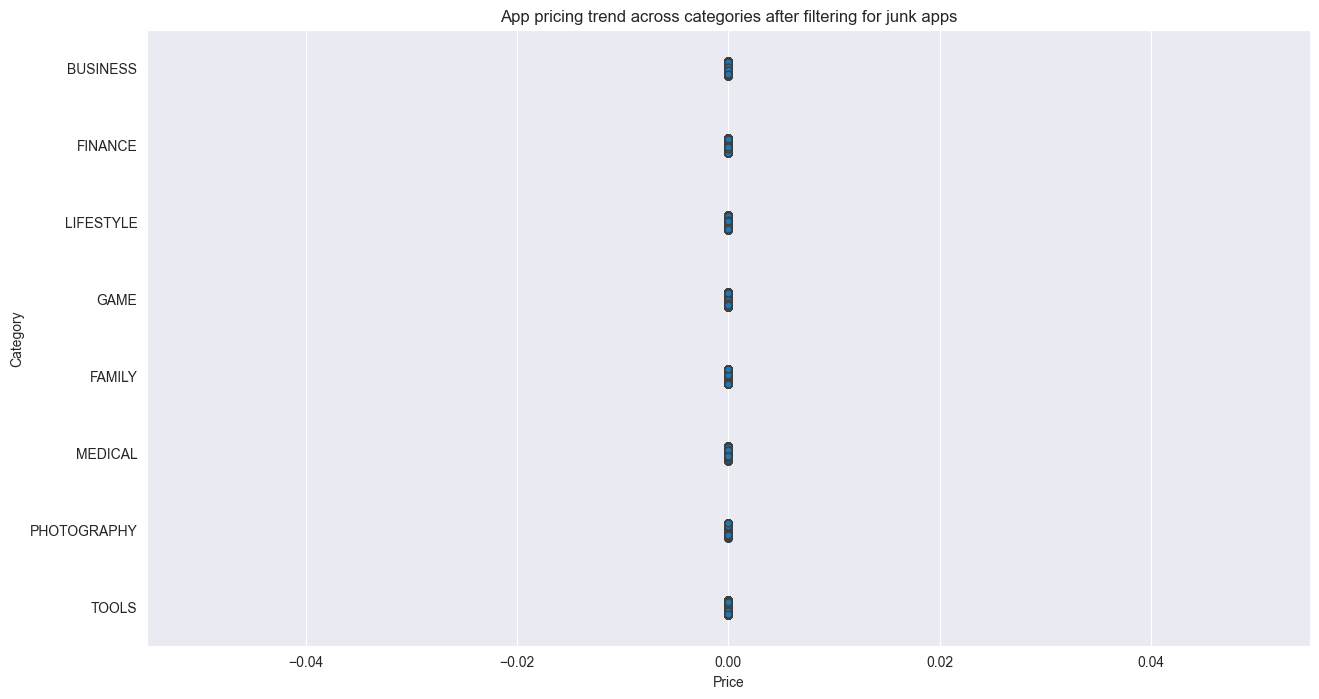

In [38]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

**8. Popularity of paid apps vs free apps**

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

. Free to download.
. Main source of income often comes from advertisements.
. Often created by companies that have other products and the app serves as an extension of those products.
. Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

. Users are asked to pay once for the app to download and use it.
. The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [42]:
import pandas as pd
import plotly.graph_objects as go

# Load the apps.csv file into a Pandas DataFrame
apps = pd.read_csv('data_set/apps.csv')

# Create box plots
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name='Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name='Free'
)

# Create layout
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
        type='log',
        autorange=True
    )
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

**9. Sentiment analysis of user reviews**

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

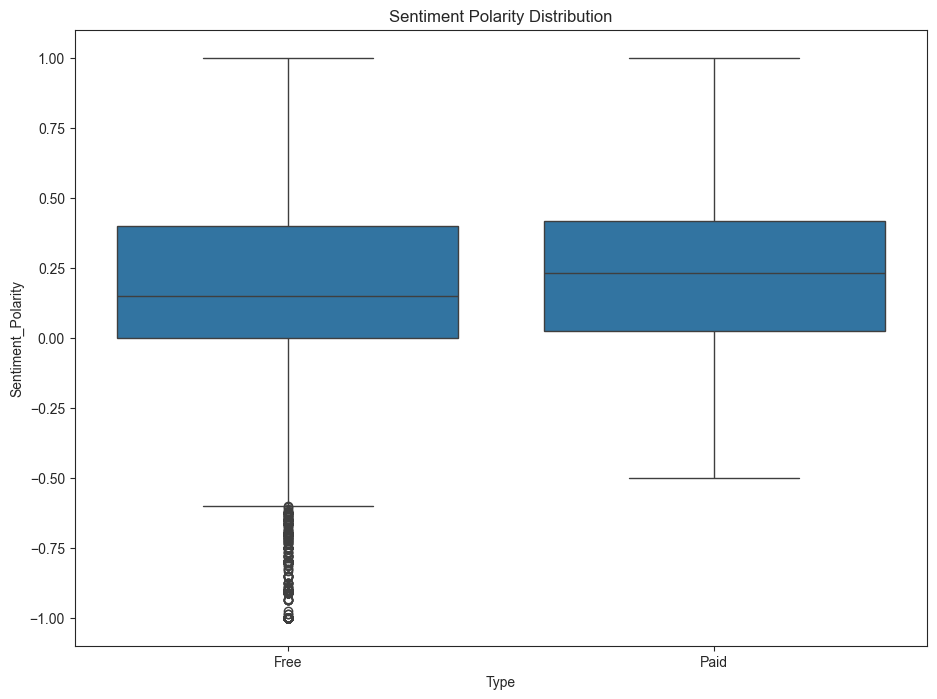

In [45]:
# Load user_reviews.csv
reviews_df = pd.read_csv('data_set/user_reviews.csv')

# Inner join and merge
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')

**Key Findings and Insights**

This analysis is based on the dataset of over ten thousand apps available on the Google Play Store. The dataset includes various features such as app installs, size, rating, price, and user reviews. Here are the key findings and insights from the analysis:

**. Dataset Description and Background:**

The dataset consists of two main files: apps.csv and user_reviews.csv. The apps.csv file contains information about the apps, including the app name, category, installs, size, rating, price, and type (free or paid). The user_reviews.csv file contains user reviews for the apps, including the app name, user rating, review text, sentiment, and translated review. The dataset was processed to remove special characters from the Installs and Price columns, and to filter out junk apps priced above $100.

**. App Categories:**

. There are 33 unique app categories present in the dataset.

. Family and Game apps have the highest market prevalence.

. Tools, Business, and Medical apps are also at the top.

. The fewest number of apps are present in the Comics and Auto & Vehicles categories.

**. Distribution of App Ratings:**

. The average volume of ratings across all app categories is 4.17.

. The histogram plot is skewed to the left, indicating that the majority of the apps are highly rated.

. The majority of top-rated apps (rating over 4) range from 2 MB to 20 MB.

**. Size and Price of an App:**

. The majority of apps price themselves under $10.

. The size of an app affects its rating, with the majority of top-rated apps ranging from 2 MB to 20 MB.

. Users prefer light-weighted apps over system-heavy apps.

. The price of an app affects its rating, with users preferring free or inexpensive apps.

**. Relation between App Category and App Price:**

. Different categories demand different price ranges.

. Medical and Family apps are the most expensive.

. All game apps are reasonably priced below $20.

**. Popularity of Paid Apps vs Free Apps**

. Paid apps have a relatively lower number of installs than free apps.

. The difference in the number of installs between paid and free apps is not as stark as expected.

**. Sentiment Analysis of User Reviews**

. Free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis.

. Reviews for paid apps appear never to be extremely negative.

. The median polarity score for paid apps is a little higher than free apps, indicating that paid apps may be of higher quality than free apps on average.

**. Implications and Recommendations**

. App developers should focus on optimizing the size and price of their apps to attract more users.

. App developers should also consider the app category and target market when selecting the right pricing strategy.

. App developers should monitor user reviews and feedback to improve app quality and user satisfaction.

. Google Play Store should consider implementing more stringent quality control measures to filter out junk apps and improve the overall user experience.